In [1]:
from field_kit import FourierAnalysis, GaussianRandomField, plaw_with_cutoffs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters for the Gaussian random fields
l_min = 30.0
l_max = 200.0
alpha = -11.0 / 3.0
f_rms = 10.0  # normalization of the field

In [3]:
# Make a power-law spectrum
power_spec = plaw_with_cutoffs(l_min, l_max, alpha)

In [4]:
# Renomalize the power spectrum to have the desired RMS value
power_spec.renormalize(f_rms)

In [5]:
# Parameters for the box and grid
le = np.array([0.0, 0.0, 0.0])
re = np.array([750.0, 750.0, 750.0])
ddims = [256] * 3
width = re - le

In [6]:
# Generate a gaussian random vector field
vgen = GaussianRandomField(le, re, ddims, power_spec, seed=10)
v = vgen.generate_vector_field_realization()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
# This is a class I wrote to simplify stuff
fa = FourierAnalysis(width, ddims)

In [8]:
# Decompose the field into its compressive (divergence) and solenoidal components
vc = fa.divergence_component(v)
vs = v-vc

In [9]:
# Get the power spectrum of the compressive and solenoidal components
nbins = 60  # Number of bins for the power spectrum, it will
# use the min-max wavenumbers as boundaries
kc, Pkc = fa.make_powerspec(vc[0], nbins)
ks, Pks = fa.make_powerspec(vs[0], nbins)

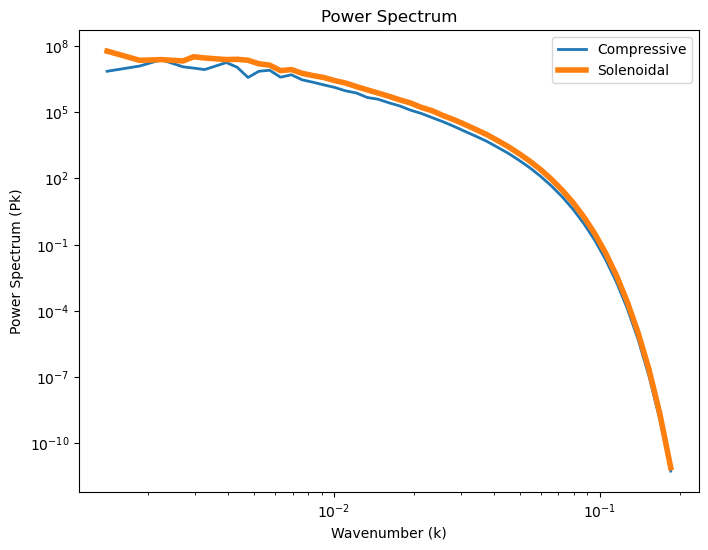

In [10]:
# Now let's plot both the expected and computed power spectra
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.loglog(kc, Pkc, label="Compressive", lw=2)
ax.loglog(ks, Pks, label="Solenoidal", lw=4)
ax.set_xlabel("Wavenumber (k)")
ax.set_ylabel("Power Spectrum (Pk)")
ax.set_title("Power Spectrum")
ax.legend()

In [11]:
# Compute the velocity magnitude field for the following sanity checks
vmag = np.sqrt(np.sum(v*v, axis=0))

In [12]:
# For a gaussian random field in 3D, 1/3 of the power should be in compressive motions
# and 2/3 should be in solenoidal--this is a sanity check
print(np.sum(vc*vc)/np.sum(vmag**2))
print(np.sum(vs*vs)/np.sum(vmag**2))

0.33362819248981646
0.6663718075101834


In [15]:
# This is a sanity check that the solenoidal field is divergence-free,
# this number should be small
div_vs = fa.divergence_of_field(vs)
print(np.abs(div_vs*fa.delta[0]/vmag).mean())

0.0001619528244884489


In [16]:
# This is a sanity check that the compressive field is curl-free,
# this number should be small
curl_vc = fa.curl_of_field(vc)
print(np.abs(curl_vc*fa.delta[0]/vmag).mean())

7.538039392446359e-05
